## Project 2. Clustering using k-means

### Student ID:915942842
### Student Name:Xuecheng Zhang

In [389]:
# All Import Statements Defined Here
# Note: Do not change anything

import numpy 
import math
import matplotlib.pyplot as plt


# Do not use any other packages below here in your code before part 4
# install Basemap before you start

import pandas as pd
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Part 1. Implementing k-means algorithm

Complete what is missing to implement the k means algorithm.

In [390]:
class k_means:
    
    def __init__(self, data: numpy.ndarray, d: int, k: int , tol: float, max_iter: int):
        """
        data: data to cluster
        d:dimension of the data
        k: prespecified number of clusters
        tol: convergence criterion
        max_iter: maximum number of iterations allowed
        """
        self.partitions={i:[] for i in range(k) }
        self.labels=[] # list of numbers with values from 0 to k-1
        self.d=d
        self.n=data.shape[0]
        self.counter=0
    
        ### your code starts here
        self.max_iter = max_iter
        self.tol = tol
        self.k = k
        self.data=data
        ### end of your code
    
    
    def initialize_centers(self ,method: int):
        """
        method = 1:
        randomly pick k points from the data as centers
        """
        if method==0:
            self.centers=self.data[:self.k,:]
    
        elif method==1:
        ### your code starts here
            random_idx = numpy.random.permutation(self.n)
            self.centers = data[random_idx[:self.k]]
        ### end of your code
        

    def search(self):
        """
        update the partitions and the next centers;
        here we use centroids for k-means method
        """
        self.partitions={i:[] for i in range(self.k)}
        self.next_centers=numpy.array([])
        
        ### your code starts here
        for pt in self.data:#update the partition
            cluster_label = self.predict(pt)
            self.partitions[cluster_label].append(pt)#add pt to partition by cluster_lable
        self.next_centers= np.empty([self.k,self.d])
        for i in range(self.k):
            self.next_centers[i]=numpy.average(self.partitions[i], axis = 0)
        
        ### end of your code
            
            
    def is_updated(self):
        """
        return True if update is done, but has not yet converged; False otherwise;
        the convergence criterion is the sum of absolute relative differences (between self.centers and 
        self.next_centers) smaller than tol
        """

        ### your code starts here
        converged=np.sum(np.absolute((self.centers-self.next_centers)/self.centers))
        if converged >= self.tol:
            self.centers= self.next_centers
            return True
        else:
            return False
        ### end of your code

        
    def fit_model(self):
        """
        function to fit the k-means algorithms using the above functions
        """
        self.initialize_centers(0)
        ### your code starts here
        self.search() #the following code from TA's office hours
        while self.is_updated() and self.counter<=self.max_iter:
            self.search()
            self.counter+=1
        ### your code ends here
    
        self.get_labels()

        
    def set_k(self,k):
        self.k=k
        
    def predict(self, pt):
        pt=numpy.array(pt)
        distances = [ numpy.linalg.norm( pt-c ) for c in self.centers]
        cluster_label = distances.index( min(distances) )
        return cluster_label

    
    def get_labels(self):
        ### your code starts here
        # the get_labels I group study with classmate
        for dp in self.data:
            for i in range(self.k):
                for j in self.partitions[i]:
                    if any(j==dp):
                        self.labels.append(i)
                        break

        ### end of your code
        
        return self.labels
    
    def get_centers(self):
        return self.centers
    
    def get_clusters(self):
        return self.partitions

    def get_cost(self):
        """
        Here we use within cluster sum of squares as cost 
        """
        ### your code starts here

        self.cost=0
        for i in self.partitions:
            for points in self.partitions[i]:
                self.cost +=np.sum((points-self.centers[i])**2)
        ### end of your code
        return self.cost
        
    def plot_clusters(self):
        if self.d>2:
            print("Dimension too large!")
            return 
        if self.labels==[]:
            self.fit_model()
        plt.scatter( self.data[:,0] , self.data[:,1], c=self.labels ,s=3)
        plt.scatter( np.array(self.centers)[:,0],np.array(self.centers)[:,1] ,marker='*',c=list(range(self.k)) ,s=300 )

## Part 2. Implementing criteria to evaluate clustering algorithms

In [391]:
class clustering_eval_metrics:
    def __init__(self, labels: list ,true_labels=None): # label must be between 0 to number_of_labels - 1
        self.labels=numpy.array(labels)
        self.true_labels=true_labels
        self.cmat=None
        self.ars=None
        
    def set_true_labels(self, true_labels):
        self.true_labels=numpy.array(true_labels)
    
    def contingency_matrix(self): 
        """
        return a contingency matrix
        """
        ### your code starts here
        K=pd.Series(self.true_labels, name='class')
        C=pd.Series(self.labels, name='clustering')
        self.cmat=pd.crosstab(C,K,margins = False)
        ### end of your code
        
        return self.cmat
        
    def adjusted_rand_score(self):
        """
        return ARI/ARS
        """
        ### your code starts here
        self.contingency_matrix()
        from scipy.special import comb
        cmat=self.cmat.values
        col_total=cmat.sum(axis=0)
        row_total=cmat.sum(axis=1)
        RI,b_j,a_i=0,0,0
        for j in col_total:
            b_j+= comb(j,2)
        for i in row_total:
            a_i+= comb(i,2)
        for i in range(cmat.shape[0]):
            for j in range(cmat.shape[1]):
                RI+= comb(cmat[i][j],2)
        n=comb(len(labels),2)
        exp_RI=(a_i*b_j)/n
        max_RI=0.5*(a_i+b_j)
        self.ars=(RI-exp_RI)/(max_RI-exp_RI)
        
        
        ### end of your code

        return self.ars
    
        

## Part 3. k-medoid algorithm

Write a class called pam to implement the k-medoid algorithm. It should have a similar structure as the k_means class as we implemented before. Write the code as concise as possible. Any code that exceeds 40 lines will get penalized.

pam should take one more parameter p. the input will look like

(data: numpy.ndarray, d: int, k: int , tol: float, max_iter: int, p: float)

p indicates whtat Lp norm is used. $ |x|_{L_p}=( x_1^p+\ldots+x_d^p  )^{1/p}  $

In [392]:
### Your code starts here
class pam(k_means):
    def __init__(self,data: numpy.ndarray, d: int, k: int , tol: float, max_iter: int, p: float):
        k_means.__init__(self,data,d,k,tol,max_iter)
        self.p=p
    def search(self):
        """
        update the partitions and the next centers;
        here we use centroids for pam method
        """
        c_list=[]
        cost=0
        self.partitions={i:[] for i in range(self.k)}
        self.next_centers=self.centers.copy()
        for i in range(0,self.n):
            distance = np.array([np.linalg.norm(self.data[i] - center,self.p) for center in self.centers])
            self.partitions[np.argmin(distance)].append(self.data[i])
        for j in range(self.k):
            for i in self.partitions[j]:
                distance1=np.array([np.linalg.norm(pt - i,self.p) for pt in self.partitions])
                cost=np.sum(distance)
                c_list.append(cost)
            self.next_centers[j]=self.partitions[j][np.argmin(c_list)]#find the medoid in each cluster

### your code ends here

## Part 4. Simulation Study 

### You may choose not to use the functions written above to finish this part. Then, you automatically lose all the points from Part 1~3.

Sample $60$ data points each from the following distributions each

$$ X_1\sim N\bigg(\begin{pmatrix}
0\\
0\end{pmatrix},\begin{pmatrix}
1 & 0\\
0 & 1 \end{pmatrix}\bigg),X_2\sim N\bigg(\begin{pmatrix}
3\\
2\end{pmatrix},\begin{pmatrix}
2 & 1\\
1 & 1 \end{pmatrix}\bigg)
, X_3\sim N\bigg(\begin{pmatrix}
5\\
0\end{pmatrix},\begin{pmatrix}
2 & 1\\
1 & 1 \end{pmatrix}\bigg) $$

to form a sample of size $180$.  Use numpy.random.multivariate_normal() and set numpy.random.seed(20) in front.

In [393]:
data=numpy.array([])
true_label=numpy.array([])

### your code starts here
numpy.random.seed(20)
x1=numpy.random.multivariate_normal([0,0],[[1,0],[0,1]],60)
x2=numpy.random.multivariate_normal([3,2],[[2,1],[1,1]],60)
x3=numpy.random.multivariate_normal([5,0],[[2,1],[1,1]],60)
data=numpy.row_stack((x1,x2,x3))
### your code ends here


### 4.1 Apply k-means method (set k=3) to the simulated data set. Plot different clusters and their centers. Also calculate the adjusted rand score.

0.7535565586781533

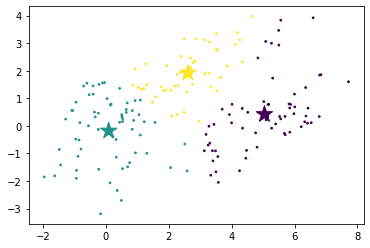

In [394]:
km=k_means(data,2,3,1e-7,500)
km.fit_model()
km.plot_clusters()
true_label=numpy.array([0]*60+[1]*60+[2]*60)
label=km.get_labels()
C=clustering_eval_metrics(label,true_label)
C.adjusted_rand_score()

### 4.2a Apply pam method (set k=3) to the simulated data set. Plot different clusters and their centers using the L_p "norm" when p=.1 and p=2. Also calculate the adjusted rand score.

0.507537850252202

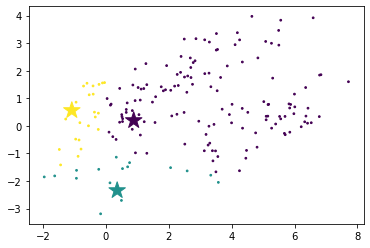

In [395]:
pam1=pam(data,2,3,1e-7,500,2)
pam1.fit_model()
pam1.plot_clusters()
label1=pam1.get_labels()
true_label1=numpy.array([0]*60+[1]*60+[2]*60)
CEM1=clustering_eval_metrics(label1,true_label1)
CEM1.adjusted_rand_score()

0.47310290807147276

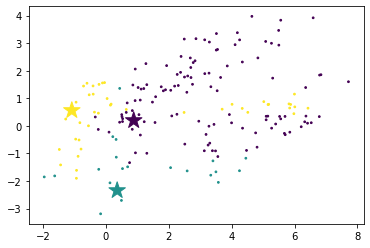

In [396]:
pam2=pam(data,2,3,1e-7,500,0.1)
pam2.fit_model()
pam2.plot_clusters()
label2=pam2.get_labels()
true_labe2=numpy.array([0]*60+[1]*60+[2]*60)
CEM1=clustering_eval_metrics(label2,true_labe2)
CEM1.adjusted_rand_score()

### 4.2b Can you compare these results and analyze quantitatively the cause of the difference?

In pam method, when p=2, the caclutation of pam's distance is same as the k-means' distance, and the k-means method use min-distance to choose the next center, the pam method use less cost to choose next center. So the ARI of k-means and pam(p=2) is smaller, but pam(p=0.1) seems that not convex.

### 4.3 How to choose k? First interpret the plot that you get from the code below, then come up with a procedure using this plot to find a k. What's k you would like to use? Explain why.

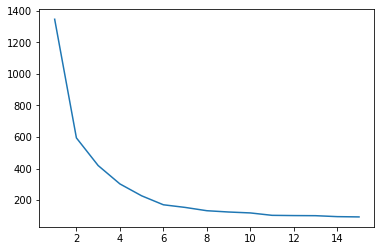

In [397]:
wcss=[]
km=k_means(data, 2, 1,1e-7,500)
for i in range(1,16):
    km.k=i
    km.fit_model()
    wcss.append(km.get_cost())
plt.plot(list(range(1,16)),wcss)

Clearly the elbow is forming at K=2. So the optimal value will be 2 for performing K-Means.

## Part 5. Segment Analysis


### About the dataset

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

In [398]:
filename='weather.csv'
df = pd.read_csv(filename)
df = df[pd.notnull(df["Tm"])]
df = df.reset_index(drop=True)
df.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### Visualization of the data

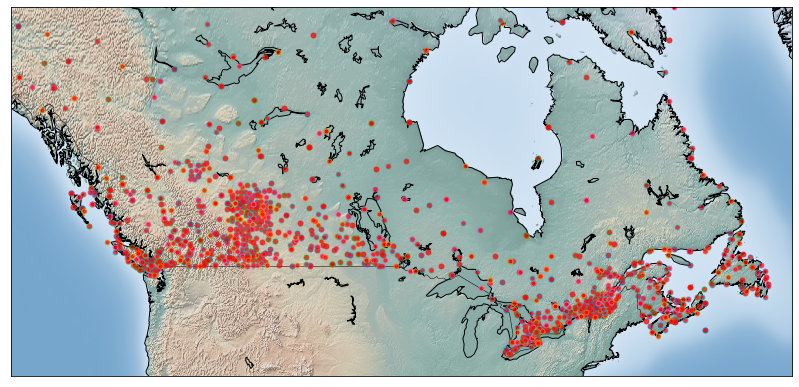

In [399]:
rcParams['figure.figsize'] = (14,10)
llon=-140
ulon=-50
llat=40
ulat=65
df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.shadedrelief()


## this is to change longitude and latitude to coordinates

xs,ys = my_map(numpy.asarray(df.Long), numpy.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()

# plot the stations on the map
for index,row in df.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

### In the following, you'll work on two datasets data1 (segmentation based on location data only) and data2 (segmentation based on location data as well as the temperature data) to perform k means methods with an appropriate k to do clustering and then label the clusters on two separate maps. You need to justify every decisions you make by appropriate plots or reasoning. 

In [400]:
## do not change anything in this block
data1= df[['xm','ym']].to_numpy()
data2 = df[['xm','ym','Tx','Tm','Tn']].to_numpy()

data1 = numpy.nan_to_num(data1)
data1 = StandardScaler().fit_transform(data1)
data2 = numpy.nan_to_num(data2)
data2 = StandardScaler().fit_transform(data2)


First I use Elbow method to choose appropriate K.

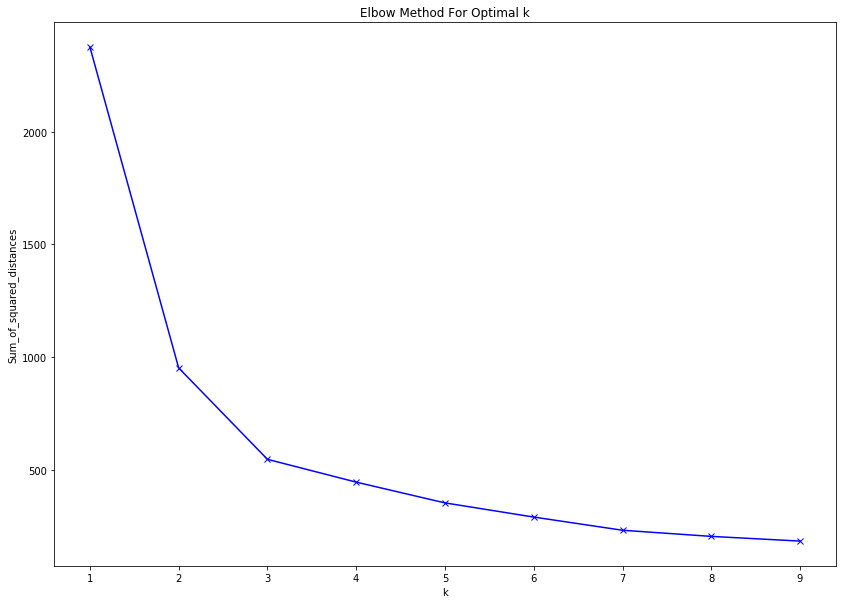

In [402]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data1)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Clearly the elbow is forming at K=2. So the optimal value will be 2 for performing K-Means for data1.

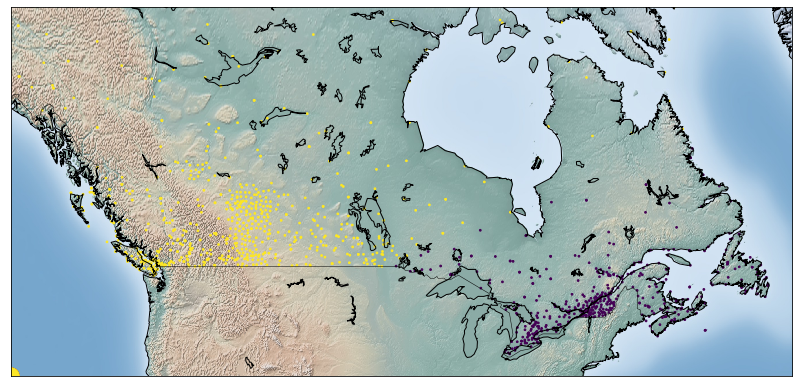

In [404]:
# fit the k-mean method
km1=KMeans(n_clusters=2).fit(data1)
labels1=km1.labels_
centers=km1.cluster_centers_


#plot the map
my_map1 = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 
my_map1.drawcoastlines()
my_map1.drawcountries()
my_map1.shadedrelief()


## this is to change longitude and latitude to coordinates

xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
data1[:,0]= xs.tolist()
data1[:,1] =ys.tolist()


# the following code that I group study with classmates:Yiqi Ren, Xiaopeng Lan
plt.scatter( data1[:,0] , data1[:,1], c=labels1 ,s=3)
plt.scatter( np.array(centers)[:,0],np.array(centers)[:,1] ,marker='o',c=list(range(2)) ,s=300 )

# plot the stations on the map
#for index,row in df.iterrows():
 #   my_map1.plot(row.xm, row.ym, marker='o', markersize= 5, alpha = 0.75)
#plt.show()

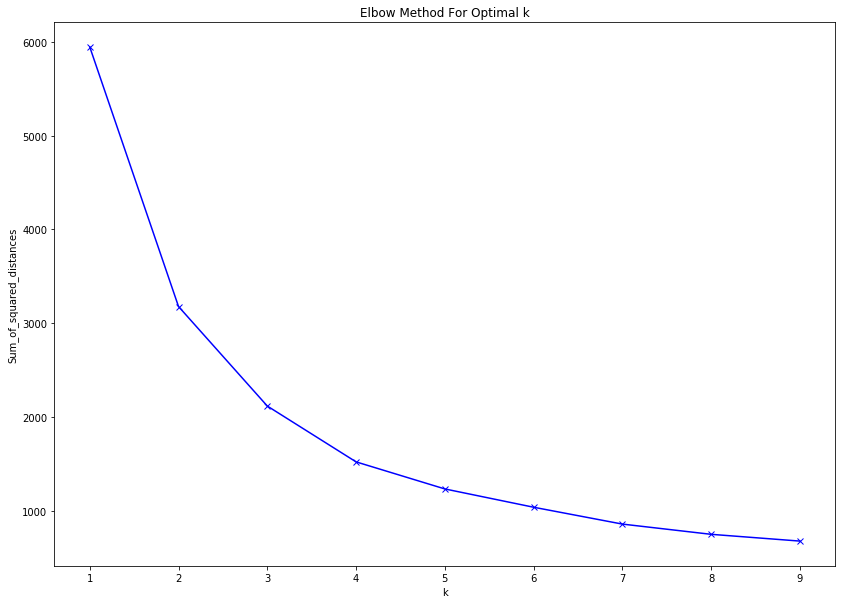

In [405]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data2)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From this Elbow plot, I can not choose appropriate K, it is not clear enough, so I choose Silhouette Method to find Silhouette Method.

Text(0.5, 1.0, 'Silhouette Method For Optimal k')

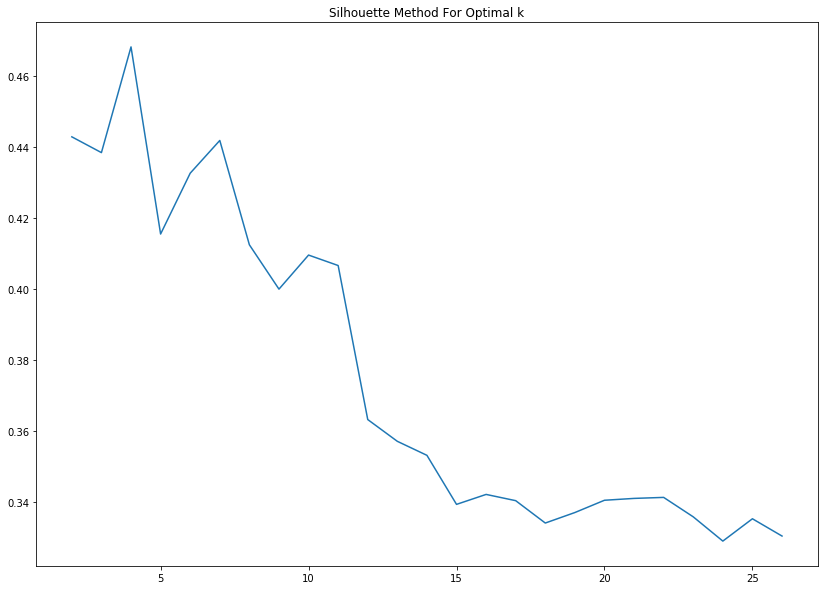

In [406]:
from sklearn.metrics import silhouette_score
sil = []
kmax = 26
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data2)
  labels = kmeans.labels_
  sil.append(silhouette_score(data2, labels, metric = 'euclidean'))
plt.plot(list(range(2,kmax+1)),sil)
plt.title('Silhouette Method For Optimal k')

From this Silhouette plot, there is a clear peak at k = 3.

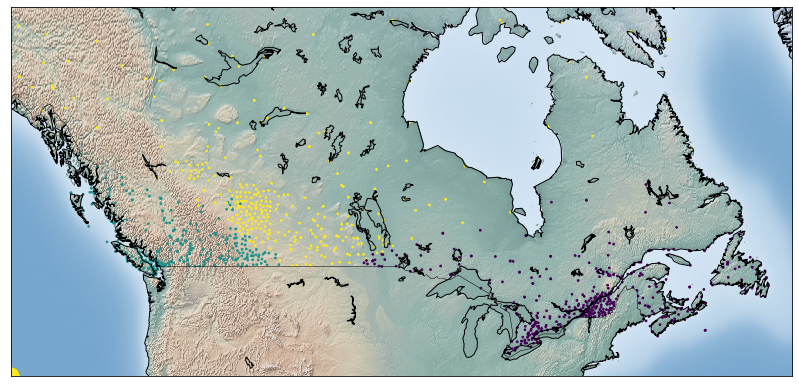

In [407]:
# fit the k-mean method
km2=KMeans(n_clusters=3).fit(data2)
labels2=km2.labels_
centers=km2.cluster_centers_


#plot the map
my_map1 = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 
my_map1.drawcoastlines()
my_map1.drawcountries()
my_map1.shadedrelief()


## this is to change longitude and latitude to coordinates
# the following code that I group study with classmates
xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
data1[:,0]= xs.tolist()
data1[:,1] =ys.tolist()
plt.scatter( data1[:,0] , data1[:,1], c=labels2 ,s=3)
plt.scatter( np.array(centers)[:,0],np.array(centers)[:,1] ,marker='o',c=list(range(3)) ,s=300 )

# plot the stations on the map
#for index,row in df.iterrows():
 #   my_map1.plot(row.xm, row.ym, marker='o', markersize= 5, alpha = 0.75)
#plt.show()

### Add your code for problem 3 from part B below.

In [408]:
# Load the data - see notebook on "Dimension Reduction, PCA, kernel PCA, Part 1"
# put your code here
from scipy.cluster import hierarchy
filename='usarrests.csv'
df = pd.read_csv(filename)
df=df.iloc[:,1:5]
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


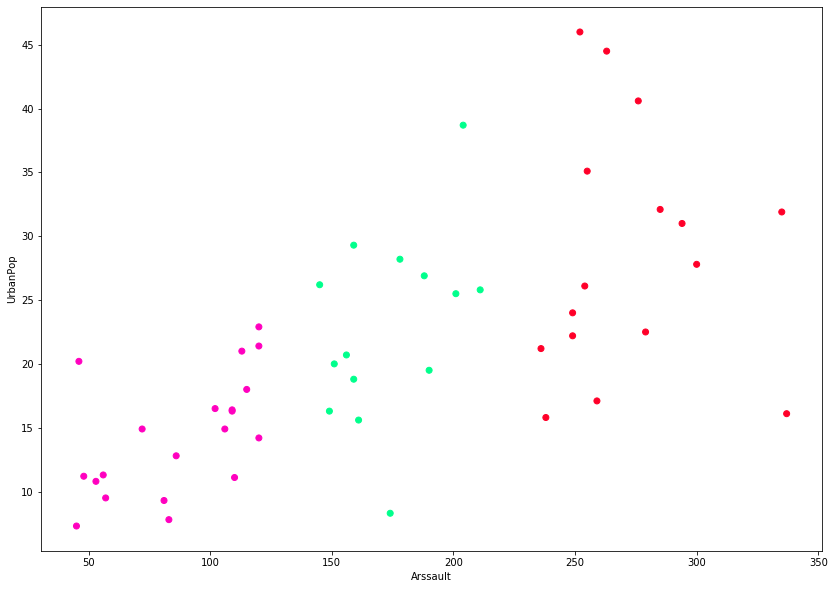

In [409]:
# Peform hierarchical clustering on the states using complete linkage clustering 
# (using Euclidean distance) and plot the corresponding denrogram

Z=hierarchy.linkage(df,'complete',metric = 'euclidean')
d_index=hierarchy.fcluster(Z,t=150,criterion="distance")
# find the label differents in Arssault and Rape relationship
x = df.iloc[:,1]#set Arssault be x
y = df.iloc[:,3]# set Rape be y 
plt.scatter(x, y, c=d_index, cmap='gist_rainbow')
plt.ylabel('UrbanPop')
plt.xlabel('Arssault')
plt.show()

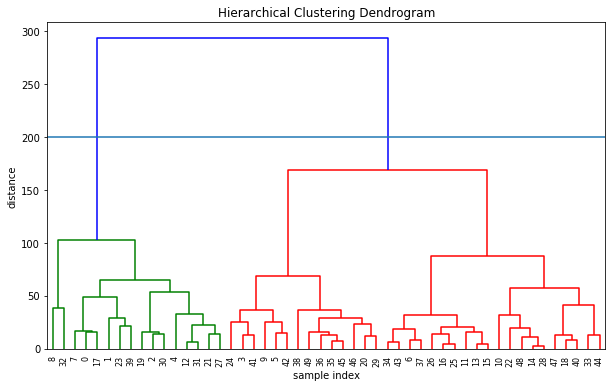

In [410]:
# Find the states in each cluster and print them
Z=hierarchy.linkage(df,'complete',metric = 'euclidean')
plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axhline(y=200)
dn=hierarchy.dendrogram(Z)

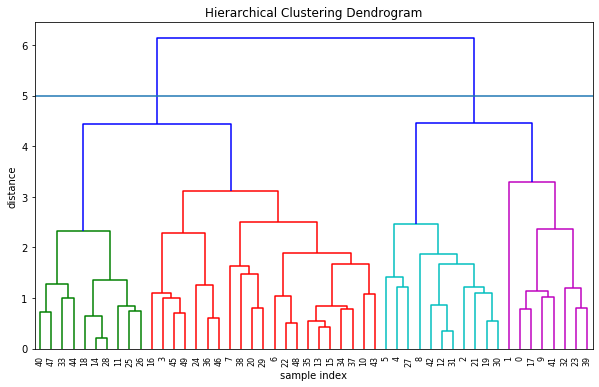

In [411]:
# Now standardize the data and perform hierarchical clustering as above
sc = StandardScaler()
X = sc.fit_transform(df)
Z2=hierarchy.linkage(X,'complete',metric = 'euclidean')
plt.figure(figsize=(10,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.axhline(y=5)
dn=hierarchy.dendrogram(Z2)

In [412]:
# Find a "reasonable" partition by considering the dedrogram

**Put your answer to Problem 3, part (d) here:**



Scaling is appropriate in this data, becausethe ranges of Murder, Assault, and Rape vary, and UrbanPop have different unit of measurement; the Assault have heavy weight. Before standardize, we can clear see two cluster when distance around 190, after standardize, we can clear see two cluster when distance around 5, so if the variables are scaled to proportional units, the results will be more meaningful.

## <font color="blue"> Submit both a pdf file and your original jupyter notebook on canvas.</font>